<a href="https://colab.research.google.com/github/Mwangi-dan/Time-series-forecasting/blob/main/air_quality_forecasting_starter_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Beijing Air Quality Forecasting Starter Notebook

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
import tensorflow as tf

In [2]:
# Mount Google Drive to access datasets
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
# Load the datasets
# Ensure train.csv and test.csv are saved in your Google Drive in the same folder.
# Replace the file paths below with the actual paths to your dataset.
train = pd.read_csv('/content/drive/MyDrive/Kaggle_competition_ML/air_quality_forcasting/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Kaggle_competition_ML/air_quality_forcasting/test.csv')


# Explore the training data

In this sections explore your dataset with appropiate statistics and visualisations to understand your better. Ensure that you explain output of every code cell and what it entails.

In [4]:
# Inspecting the first few rows of the dataset to understand its structure.
print("Training Data Overview:")
train.head()

Training Data Overview:


,No,DEWP,TEMP,PRES,Iws,Is,Ir,datetime,cbwd_NW,cbwd_SE,cbwd_cv,pm2.5
0,1,-1.580878,-1.922250,0.443328,-0.441894,-0.069353,-0.137667,2010-01-01 00:00:00,1.448138,-0.732019,-0.522096,NaN
1,2,-1.580878,-2.004228,0.345943,-0.379306,-0.069353,-0.137667,2010-01-01 01:00:00,1.448138,-0.732019,-0.522096,NaN
2,3,-1.580878,-1.922250,0.248559,-0.343514,-0.069353,-0.137667,2010-01-01 02:00:00,1.448138,-0.732019,-0.522096,NaN
3,4,-1.580878,-2.168183,0.248559,-0.280926,-0.069353,-0.137667,2010-01-01 03:00:00,1.448138,-0.732019,-0.522096,NaN
4,5,-1.511594,-2.004228,0.151174,-0.218339,-0.069353,-0.137667,2010-01-01 04:00:00,1.448138,-0.732019,-0.522096,NaN


In [7]:
train.columns

Index(['No', 'DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir', 'cbwd_NW', 'cbwd_SE',
       'cbwd_cv', 'pm2.5'],
      dtype='object')

In [5]:
# Ensure 'datetime' column is in datetime format
train['datetime'] = pd.to_datetime(train['datetime'])

test['datetime'] = pd.to_datetime(test['datetime'])

# Set the 'datetime' column as the index for better time-series handling
train.set_index('datetime', inplace=True)
# val.set_index('datetime', inplace=True)
test.set_index('datetime', inplace=True)


# Handle missing values


- Check the dataset for missing values and decide how to handle them.
- In this example, missing values are filled with the mean. You can experiment with other strategies.

In [6]:
train.fillna(train.mean(), inplace=True)
test.fillna(test.mean(), inplace=True)


# Separate features and target

- Feel free to trop any non-essential columns like that you think might not contribute to modeling.

In [7]:
X_train = train.drop(['pm2.5', 'No'], axis=1)
y_train = train['pm2.5']

In [8]:
# Reshape data for LSTM input
# LSTM models require data in the shape (samples, timesteps, features).
# Here, the data is reshaped to add a "timesteps" dimension.
X_train = np.expand_dims(X_train, axis=1)

In [11]:
y_train

,pm2.5
datetime,
2010-01-01 00:00:00,100.793427
2010-01-01 01:00:00,100.793427
2010-01-01 02:00:00,100.793427
2010-01-01 03:00:00,100.793427
2010-01-01 04:00:00,100.793427
...,...
2013-07-01 23:00:00,50.000000
2013-07-02 00:00:00,41.000000
2013-07-02 01:00:00,32.000000


# Build model

Below is a simple LSTM model. Your task is to experiment with different parameters like, numbers of layers, units, activation functions, and optimizers, etc to get the best performing model. Experiment with other optimizers (e.g., SGD) or hyperparameters to improve performance.

In [28]:
# define model
model = Sequential([
    LSTM(32, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(1)
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=[lambda y, y_pred: tf.sqrt(tf.reduce_mean(tf.square(y - y_pred)))]  # RMSE metric
)

# Display the model architecture
model.summary()



/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 64)                  │          18,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,009 (74.25 KB)

 Trainable params: 19,009 (74.25 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
# Architecture model with more layers
model = Sequential([
    LSTM(64, activation='relu'),
    LSTM(32, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [11]:
# Iteration 3
model_good = Sequential([
    LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.3),
    LSTM(64, return_sequences=False),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])

# Use learning rate schedule
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
# Iteration 3
model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.3),
    LSTM(64, return_sequences=True),
    Dropout(0.2),
    LSTM(32, activation='relu', return_sequences=False),
    Dense(32, activation='relu'),
    Dense(1)
])

# Use learning rate schedule
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# Add early stopping
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Train with validation split
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


384/384 ━━━━━━━━━━━━━━━━━━━━ 15s 17ms/step - loss: 13487.0996 - mae: 84.1858 - val_loss: 10109.4238 - val_mae: 66.8392
Epoch 2/100
384/384 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 6366.3223 - mae: 55.2508 - val_loss: 8188.3828 - val_mae: 59.2729
Epoch 3/100
384/384 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 5414.3872 - mae: 51.2600 - val_loss: 7791.1436 - val_mae: 58.7427
Epoch 4/100
384/384 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 5309.7334 - mae: 51.2363 - val_loss: 7603.9604 - val_mae: 57.8388
Epoch 5/100
384/384 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 5337.6890 - mae: 50.9534 - val_loss: 7312.4072 - val_mae: 57.6995
Epoch 6/100
384/384 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 5243.4116 - mae: 50.7301 - val_loss: 7242.4849 - val_mae: 56.7636
Epoch 7/100
384/384 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 5287.1826 - mae: 50.5220 - val_loss: 7205.8594 - val_mae: 56.5058
Epoch 8/100
384/384 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 5269.0806 - mae: 50.3099 - val_loss: 7211.2842 - val

In [10]:
# Improved LSTM Model
model = Sequential([
    LSTM(256, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    BatchNormalization(),
    Dropout(0.3),
    LSTM(128, return_sequences=True),
    BatchNormalization(),
    Dropout(0.2),
    LSTM(64, activation='relu', return_sequences=False),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

# Use learning rate schedule
optimizer = Adam(learning_rate=0.0003)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# Add early stopping and ReduceLROnPlateau
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)


# Train with validation split
history = model.fit(
    X_train, y_train,
    epochs=150,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/150
384/384 ━━━━━━━━━━━━━━━━━━━━ 30s 30ms/step - loss: 11593.9658 - mae: 75.1800 - val_loss: 15558.6299 - val_mae: 81.7071
Epoch 2/150
384/384 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - loss: 5217.1938 - mae: 50.4949 - val_loss: 7022.6123 - val_mae: 55.7899
Epoch 3/150
384/384 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - loss: 5278.0112 - mae: 50.6255 - val_loss: 6904.6367 - val_mae: 55.3182
Epoch 4/150
384/384 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - loss: 4949.1807 - mae: 49.0616 - val_loss: 6791.4556 - val_mae: 55.8882
Epoch 5/150
384/384 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - loss: 5100.2305 - mae: 49.4830 - val_loss: 6777.5337 - val_mae: 55.7752
Epoch 6/150
384/384 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - loss: 4779.6099 - mae: 48.6081 - val_loss: 6742.3633 - val_mae: 55.1630
Epoch 7/150
384/384 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - loss: 4803.9287 - mae: 48.6550 - val_loss: 6847.5854 - val_mae: 54.8429
Epoch 8/150
384/384 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - loss: 5076.3184 - mae: 49.3051 - val_loss:

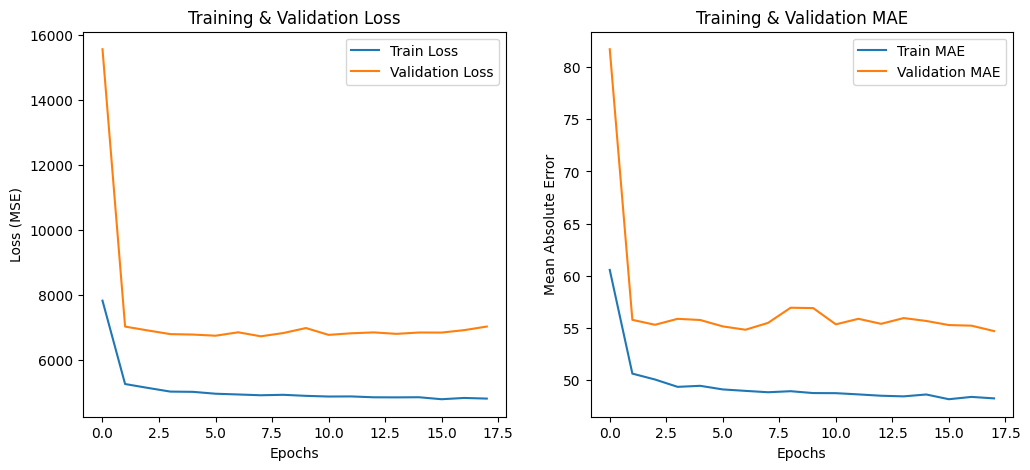

NameError: name 'X_test' is not defined

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Training History
def plot_training_history(history):
    plt.figure(figsize=(12, 5))

    # Loss Curve
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss (MSE)')
    plt.title('Training & Validation Loss')
    plt.legend()

    # MAE Curve
    plt.subplot(1, 2, 2)
    plt.plot(history.history['mae'], label='Train MAE')
    plt.plot(history.history['val_mae'], label='Validation MAE')
    plt.xlabel('Epochs')
    plt.ylabel('Mean Absolute Error')
    plt.title('Training & Validation MAE')
    plt.legend()

    plt.show()

# Predictions vs. Actual Values
def plot_predictions(y_test, y_pred):
    plt.figure(figsize=(10, 5))
    plt.plot(y_test, label='Actual', color='blue', alpha=0.7)
    plt.plot(y_pred, label='Predicted', color='red', linestyle='dashed', alpha=0.7)
    plt.xlabel('Time Steps')
    plt.ylabel('PM2.5 Levels')
    plt.title('Predicted vs. Actual PM2.5 Values')
    plt.legend()
    plt.show()

# Residual Distribution (Error Analysis)
def plot_residuals(y_test, y_pred):
    residuals = y_test - y_pred
    plt.figure(figsize=(8, 5))
    sns.histplot(residuals, bins=50, kde=True, color='purple')
    plt.xlabel('Prediction Error')
    plt.ylabel('Frequency')
    plt.title('Residual Distribution')
    plt.axvline(residuals.mean(), color='red', linestyle='dashed', label=f'Mean Error: {residuals.mean():.2f}')
    plt.legend()
    plt.show()

# Error Over Time
def plot_error_trends(y_test, y_pred):
    residuals = y_test - y_pred
    plt.figure(figsize=(10, 5))
    plt.plot(residuals, label='Prediction Error', color='orange')
    plt.xlabel('Time Steps')
    plt.ylabel('Error')
    plt.title('Prediction Error Trends Over Time')
    plt.axhline(0, color='black', linestyle='dashed')
    plt.legend()
    plt.show()

# Run visualizations for the best model
plot_training_history(history)
y_pred = model.predict(X_test)
plot_predictions(y_test, y_pred)
plot_residuals(y_test, y_pred)
plot_error_trends(y_test, y_pred)


In [16]:
# Optimized LSTM Model
model = Sequential([
    Bidirectional(LSTM(256, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]))),
    BatchNormalization(),
    Dropout(0.3),
    LSTM(128, return_sequences=True, recurrent_dropout=0.2),
    BatchNormalization(),
    Dropout(0.2),
    LSTM(64, activation='relu', return_sequences=False),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

# Use learning rate schedule with Adam optimizer
optimizer = Adam(learning_rate=0.0002)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# Add early stopping and ReduceLROnPlateau
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=12,
    restore_best_weights=True
)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=4,
    min_lr=1e-6
)

early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Train with validation split
history = model.fit(
    X_train, y_train,
    epochs=200,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/200


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


767/767 ━━━━━━━━━━━━━━━━━━━━ 35s 29ms/step - loss: 9516.5381 - mae: 68.1924 - val_loss: 7359.3247 - val_mae: 56.9687
Epoch 2/200
767/767 ━━━━━━━━━━━━━━━━━━━━ 21s 28ms/step - loss: 5424.1646 - mae: 50.9770 - val_loss: 7172.2622 - val_mae: 56.9068
Epoch 3/200
767/767 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - loss: 5376.1743 - mae: 50.3927 - val_loss: 6916.4688 - val_mae: 55.5767
Epoch 4/200
767/767 ━━━━━━━━━━━━━━━━━━━━ 23s 28ms/step - loss: 5076.7900 - mae: 49.5662 - val_loss: 7003.1440 - val_mae: 55.6942
Epoch 5/200
767/767 ━━━━━━━━━━━━━━━━━━━━ 39s 26ms/step - loss: 5121.8877 - mae: 49.8158 - val_loss: 7114.5889 - val_mae: 55.8012
Epoch 6/200
767/767 ━━━━━━━━━━━━━━━━━━━━ 22s 28ms/step - loss: 4987.7212 - mae: 49.7619 - val_loss: 6980.7358 - val_mae: 56.1720
Epoch 7/200
767/767 ━━━━━━━━━━━━━━━━━━━━ 41s 28ms/step - loss: 5180.3545 - mae: 50.2933 - val_loss: 6824.9150 - val_mae: 55.2177
Epoch 8/200
767/767 ━━━━━━━━━━━━━━━━━━━━ 40s 27ms/step - loss: 4952.4756 - mae: 48.8548 - val_loss: 7140.3164

In [14]:
# iteration 14
model = Sequential([
    Bidirectional(LSTM(256, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]))),
    BatchNormalization(),
    Dropout(0.3),
    GRU(128, return_sequences=True, recurrent_dropout=0.2),
    BatchNormalization(),
    Dropout(0.2),
    LSTM(64, activation='relu', return_sequences=False),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

optimizer = Adam(learning_rate=0.0002)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

history = model.fit(
    X_train, y_train,
    epochs=25,
    batch_size=16,
    validation_split=0.2,
    verbose=1
)

Epoch 1/25
1534/1534 ━━━━━━━━━━━━━━━━━━━━ 53s 26ms/step - loss: 8630.4336 - mae: 64.5155 - val_loss: 7243.0532 - val_mae: 58.0677
Epoch 2/25
1534/1534 ━━━━━━━━━━━━━━━━━━━━ 38s 25ms/step - loss: 5325.1670 - mae: 51.1863 - val_loss: 6945.0703 - val_mae: 56.7992
Epoch 3/25
1534/1534 ━━━━━━━━━━━━━━━━━━━━ 44s 27ms/step - loss: 5311.0200 - mae: 50.3547 - val_loss: 6922.4453 - val_mae: 57.7198
Epoch 4/25
1534/1534 ━━━━━━━━━━━━━━━━━━━━ 78s 25ms/step - loss: 5260.0186 - mae: 50.8361 - val_loss: 7067.8896 - val_mae: 56.0118
Epoch 5/25
1534/1534 ━━━━━━━━━━━━━━━━━━━━ 42s 25ms/step - loss: 5181.1631 - mae: 50.2530 - val_loss: 7052.6299 - val_mae: 56.3022
Epoch 6/25
1534/1534 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - loss: 5108.6841 - mae: 50.1130 - val_loss: 6942.8076 - val_mae: 54.8703
Epoch 7/25
1534/1534 ━━━━━━━━━━━━━━━━━━━━ 44s 26ms/step - loss: 5092.8740 - mae: 49.8616 - val_loss: 6912.5347 - val_mae: 55.6537
Epoch 8/25
1534/1534 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - loss: 5126.5947 - mae: 50.4293 -

In [ ]:
# iteration 15
model = Sequential([
    Bidirectional(LSTM(256, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]))),
    BatchNormalization(),
    Dropout(0.3),
    GRU(128, return_sequences=True, recurrent_dropout=0.2),
    BatchNormalization(),
    Dropout(0.2),
    LSTM(64, activation='relu', return_sequences=False),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])
optimizer_rms = RMSprop(learning_rate=0.0001)
model.compile(optimizer=optimizer_rms, loss='mse', metrics=['mae'])

history = model.fit(
    X_train, y_train,
    epochs=300,
    batch_size=16,
    validation_split=0.2,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

In [19]:
# iteration 16
model = Sequential([
    Bidirectional(LSTM(256, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]))),
    BatchNormalization(),
    Dropout(0.3),
    LSTM(256, return_sequences=True, recurrent_dropout=0.2),
    BatchNormalization(),
    Dropout(0.2),
    LSTM(128, activation='relu', return_sequences=False),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# Add early stopping and ReduceLROnPlateau
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


384/384 ━━━━━━━━━━━━━━━━━━━━ 31s 48ms/step - loss: 8561.1670 - mae: 63.5085 - val_loss: 12431.4854 - val_mae: 69.4053
Epoch 2/100
384/384 ━━━━━━━━━━━━━━━━━━━━ 21s 54ms/step - loss: 5186.3311 - mae: 50.3318 - val_loss: 6983.9395 - val_mae: 57.4435
Epoch 3/100
384/384 ━━━━━━━━━━━━━━━━━━━━ 43s 59ms/step - loss: 5020.5757 - mae: 49.4488 - val_loss: 6992.0762 - val_mae: 55.5826
Epoch 4/100
384/384 ━━━━━━━━━━━━━━━━━━━━ 37s 49ms/step - loss: 5095.6123 - mae: 49.4697 - val_loss: 7100.9644 - val_mae: 54.4888
Epoch 5/100
384/384 ━━━━━━━━━━━━━━━━━━━━ 22s 52ms/step - loss: 5139.9438 - mae: 49.2100 - val_loss: 6928.7607 - val_mae: 55.1598
Epoch 6/100
384/384 ━━━━━━━━━━━━━━━━━━━━ 18s 47ms/step - loss: 4999.9546 - mae: 49.2705 - val_loss: 7307.6938 - val_mae: 55.2701
Epoch 7/100
384/384 ━━━━━━━━━━━━━━━━━━━━ 22s 52ms/step - loss: 4943.3730 - mae: 48.9446 - val_loss: 7037.8594 - val_mae: 55.5463
Epoch 8/100
384/384 ━━━━━━━━━━━━━━━━━━━━ 19s 49ms/step - loss: 4885.4199 - mae: 48.4620 - val_loss: 6805.533

In [17]:
# Iteration 5
# Create rolling averages for key features
for col in ['DEWP', 'TEMP', 'PRES']:
    train[f'{col}_roll3'] = train[col].rolling(3).mean().fillna(method='bfill')
    test[f'{col}_roll3'] = test[col].rolling(3).mean().fillna(method='bfill')

<ipython-input-17-6249be1070e0>:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  train[f'{col}_roll3'] = train[col].rolling(3).mean().fillna(method='bfill')
<ipython-input-17-6249be1070e0>:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  test[f'{col}_roll3'] = test[col].rolling(3).mean().fillna(method='bfill')
<ipython-input-17-6249be1070e0>:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  train[f'{col}_roll3'] = train[col].rolling(3).mean().fillna(method='bfill')
<ipython-input-17-6249be1070e0>:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  test[f'{col}_roll3'] = test[col].rolling(3).mean().fillna(method='bfill')
<ipython-input-17-62

In [13]:
model = Sequential([
        LSTM(50, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
        BatchNormalization(),
        LSTM(50, activation='relu', return_sequences=False),
        BatchNormalization(),
        Dense(1)
    ])
# Use learning rate schedule
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [24]:
# Iteration 18
model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.3),
    LSTM(64, return_sequences=True),
    Dropout(0.2),
    LSTM(32, activation='relu', return_sequences=False),
    Dense(32, activation='relu'),
    Dense(1)
])

# Use learning rate schedule
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# # Add early stopping
# early_stop = tf.keras.callbacks.EarlyStopping(
#     monitor='val_loss',
#     patience=10,
#     restore_best_weights=True
# )

# Train with validation split
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - loss: 14420.1074 - mae: 86.6065 - val_loss: 10998.5254 - val_mae: 69.4499
Epoch 2/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - loss: 6456.4277 - mae: 56.6037 - val_loss: 8845.1953 - val_mae: 62.3171
Epoch 3/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - loss: 5786.9839 - mae: 53.1750 - val_loss: 8020.8809 - val_mae: 59.1762
Epoch 4/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - loss: 5424.5015 - mae: 51.6495 - val_loss: 7528.4185 - val_mae: 57.8448
Epoch 5/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - loss: 5236.4204 - mae: 50.6588 - val_loss: 7413.0391 - val_mae: 56.5222
Epoch 6/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 5238.9595 - mae: 50.6980 - val_loss: 7292.3970 - val_mae: 56.7481
Epoch 7/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 5222.4883 - mae: 50.6401 - val_loss: 7254.3574 - val_mae: 56.5290
Epoch 8/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 5035.8032 - mae: 49.9780 - val_loss: 7190.6519 - 

In [26]:
# Iteration 19
model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.3),
    LSTM(64, return_sequences=True),
    Dropout(0.2),
    LSTM(32, activation='relu', return_sequences=False),
    Dense(32, activation='relu'),
    Dense(1)
])

# Use learning rate schedule
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# Add early stopping
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True
)

# Train with validation split
history = model.fit(
    X_train, y_train,
    epochs=70,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/70


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


384/384 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - loss: 15024.4482 - mae: 88.1124 - val_loss: 10321.6562 - val_mae: 66.4869
Epoch 2/70
384/384 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 6239.9326 - mae: 55.4079 - val_loss: 8576.2891 - val_mae: 60.6356
Epoch 3/70
384/384 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 5514.6406 - mae: 51.7892 - val_loss: 7622.2725 - val_mae: 58.2361
Epoch 4/70
384/384 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 5563.1670 - mae: 51.6095 - val_loss: 7576.8306 - val_mae: 57.2215
Epoch 5/70
384/384 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 5318.6787 - mae: 50.2176 - val_loss: 7390.6357 - val_mae: 56.8948
Epoch 6/70
384/384 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 5264.5322 - mae: 50.2005 - val_loss: 7250.3618 - val_mae: 57.2376
Epoch 7/70
384/384 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - loss: 5392.8975 - mae: 50.8267 - val_loss: 7227.3818 - val_mae: 56.6375
Epoch 8/70
384/384 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 5168.3389 - mae: 50.3021 - val_loss: 7201.7036 - val_mae: 56.1

In [30]:
model = Sequential([
    Bidirectional(LSTM(256, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]))),
    BatchNormalization(),
    Dropout(0.3),
    LSTM(256, return_sequences=True, recurrent_dropout=0.2),
    BatchNormalization(),
    Dropout(0.2),
    GRU(128, return_sequences=True, recurrent_dropout=0.2),
    BatchNormalization(),
    Dropout(0.2),
    LSTM(128, return_sequences=True),
    BatchNormalization(),
    Dropout(0.2),
    LSTM(64, activation='relu', return_sequences=False),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

optimizer = Adam(learning_rate=0.0002)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32 ,
    validation_split=0.2,
    verbose=1
)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


767/767 ━━━━━━━━━━━━━━━━━━━━ 61s 56ms/step - loss: 10245.6035 - mae: 70.0422 - val_loss: 7265.3174 - val_mae: 56.5052
Epoch 2/100
767/767 ━━━━━━━━━━━━━━━━━━━━ 36s 48ms/step - loss: 5476.9707 - mae: 51.9705 - val_loss: 7097.3408 - val_mae: 56.1704
Epoch 3/100
767/767 ━━━━━━━━━━━━━━━━━━━━ 42s 49ms/step - loss: 5236.5566 - mae: 50.5410 - val_loss: 6942.0889 - val_mae: 56.9364
Epoch 4/100
767/767 ━━━━━━━━━━━━━━━━━━━━ 41s 49ms/step - loss: 5137.3701 - mae: 50.2573 - val_loss: 6957.5718 - val_mae: 56.4080
Epoch 5/100
767/767 ━━━━━━━━━━━━━━━━━━━━ 42s 54ms/step - loss: 5168.3828 - mae: 49.9007 - val_loss: 7084.4209 - val_mae: 53.9831
Epoch 6/100
767/767 ━━━━━━━━━━━━━━━━━━━━ 78s 49ms/step - loss: 5088.3198 - mae: 49.7535 - val_loss: 7056.5239 - val_mae: 55.8102
Epoch 7/100
767/767 ━━━━━━━━━━━━━━━━━━━━ 41s 49ms/step - loss: 5150.8501 - mae: 49.8290 - val_loss: 6899.5195 - val_mae: 55.6878
Epoch 8/100
767/767 ━━━━━━━━━━━━━━━━━━━━ 41s 49ms/step - loss: 5128.0610 - mae: 49.8979 - val_loss: 6900.900

In [18]:
model = Sequential([
        GRU(50, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
        GRU(50, activation='relu', return_sequences=False),
        Dense(1)
    ])
model.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [23]:
model = Sequential([
        LSTM(150, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
        LSTM(100, activation='relu', return_sequences=True),
        LSTM(50, activation='relu', return_sequences=False),
        Dense(1)
    ])
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mse')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [27]:
model_best = Sequential([
        LSTM(128, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
        LSTM(64, activation='relu', return_sequences=True),
        LSTM(32, activation='relu', return_sequences=False),
        Dropout(0.2),
        Dense(1)
    ])
model_best.compile(optimizer=Adam(learning_rate=0.0005), loss='mse')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [28]:
# Train the model
# You can adjust the number of epochs and batch size to improve performance.
history = model_best.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32
)

Epoch 1/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - loss: 12727.6562
Epoch 2/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 6164.7686
Epoch 3/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - loss: 5732.8271
Epoch 4/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 5322.9058
Epoch 5/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - loss: 5471.3774
Epoch 6/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 5594.6685
Epoch 7/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 5586.2480
Epoch 8/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - loss: 5324.7271
Epoch 9/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - loss: 5393.2051
Epoch 10/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - loss: 5650.9009
Epoch 11/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - loss: 5434.9629
Epoch 12/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - loss: 5336.0801
Epoch 13/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 5347.2627
Epoch 14/20
959/959 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - loss: 5345.5171
Ep

959/959 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


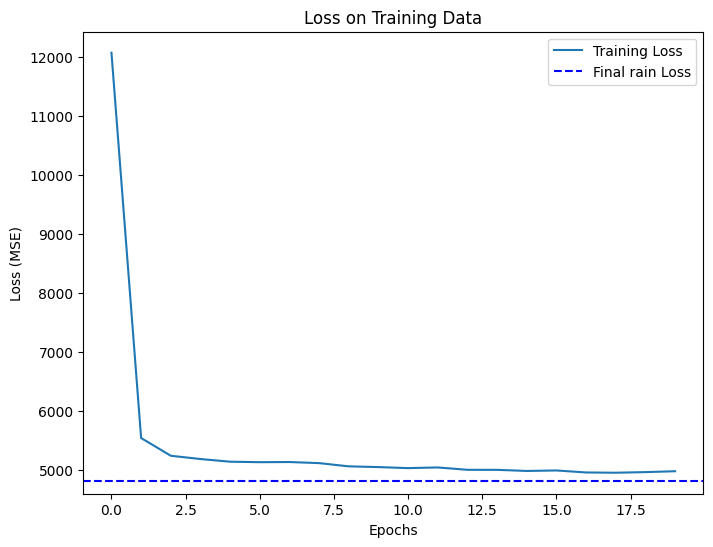

Final Training Loss (MSE): 4811.890136576636


In [15]:
# Calculate training loss
train_predictions = model.predict(X_train)
train_loss = np.mean((y_train - train_predictions.flatten())**2)

# Plot training loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')  # Training loss during epochs
plt.axhline(y=train_loss, color='blue', linestyle='--', label='Final rain Loss')  # Final training loss
plt.title('Loss on Training Data')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

print(f"Final Training Loss (MSE): {train_loss}")

In [31]:
# Prepare the test data
X_test = test.drop(['No'], axis=1)
X_test = np.expand_dims(X_test, axis=1)

# Make predictions on the test set using trained model to predict "pm2.5" concentrations
predictions = model.predict(X_test)

# Ensure predictions do not contain NaN values
predictions = np.nan_to_num(predictions)

# Convert predictions to integers
predictions = np.round(predictions).astype(int)

# Prepare the submission file
# Convert 'row ID' index to string and remove leading zeros for single-digit hours
submission = pd.DataFrame({
    'row ID': pd.to_datetime(test.index).strftime('%Y-%m-%d %-H:%M:%S'),  # Remove leading zeros for hours
    'pm2.5': predictions.flatten()
})

# Sort the submission by 'row ID' to match the solution file exactly
submission = submission.sort_values(by='row ID')

# Save the file in CSV format for submission on Kaggle
submission.to_csv('/content/drive/MyDrive/Kaggle_competition_ML/air_quality_forcasting/subm_21.csv', index=False)

411/411 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step
